# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

En el presente proyecto realizaremos:
-Preprocesamiento de datos, incluyendo su limpieza
-Tratamiento de datos, creando dataframes con merges para analizar los datos que nos guíen a encontrar la respuesta sobre ¿Qué tarifa de prepago genera más ingresos?
-Analizaremos los datos con pruebas estadísticas

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_user=pd.read_csv('/datasets/megaline_users.csv')
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_plans=pd.read_csv("/datasets/megaline_plans.csv")


En la siguiente sección, presentaremos la información de cada dataset y verificaremos si contienen filas duplicadas.

## Preparar los datos

In [3]:
print(df_user.head())

df_user.info()
print("Este dataset contiene", df_user.duplicated().sum(),"filas duplicadas.")


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    

In [4]:
print(df_calls)

df_calls.info()
print("Este dataset contiene", df_calls.duplicated().sum(),"filas duplicadas.")

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
m

In [5]:
print(df_internet)

df_internet.info()
print("Este dataset contiene", df_internet.duplicated().sum(),"filas duplicadas.")

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int

In [6]:
print(df_messages)

df_messages.info()
print("Este dataset contiene", df_messages.duplicated().sum(),"filas duplicadas.")

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
Este dataset contiene 0 filas duplicadas.


In [7]:
print(df_plans)
df_plans.info()
print("Este dataset contiene", df_plans.duplicated().sum(),"filas duplicadas.")

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

Aquí observamos que no tenemos filas duplicadas en nuestros datasets. Adicionalmente, deberemos convertir las columnas con fechas, en el tipo de datos adecuado datetime64.

## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  



En nuestro dataset, observamos tipos de datos enteros y floats, todos los tipos de datos son adecuadso según la información que incluyen en sus columnas. No tenemos datos ausentes. Podríamos definir nuestra columna "plan_name" del tipo categórico.

## Corregir datos

No hay nada que corregir.

## Enriquecer los datos

Este dataset nos servirá para agregar información útil en otros Datasets.

Podemos observar que nuestro Dataset contiene la columna "mb_per_month_included", habremos de tener ésto en cuenta para la transformación de megabytes a gigabytes, ya que la tarifa extra se cobra sobre gigabytes. Deberemos prestar especial atención para evitar confusiones.

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios

print(df_user.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  



Observamos que la columna "reg_date" necesita corrección al tipo de datos datetime64. 

### Corregir los datos

Corregiremos tipo de datos para la columna con datos de fechas.

In [12]:
df_user["reg_date"] = pd.to_datetime(df_user["reg_date"],format="%Y-%m-%d")
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

Agregamos el mes en una columna nueva.

Gracias al método info() logramos apreciar que solamente tenemos 34 líneas con datos en la columna "churn_date", lo que no representa un problema, ya que al no haber datos en esa columna indica que el usuario no ha cancelado su plan. Es decir que los usuarios para los que tenemos un valor nulo en esta columna, continuan activos con nosotros. 

In [13]:
df_user["month"]= df_user["reg_date"].dt.to_period("M").dt.start_time


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

print(df_calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Observamos que la columna "call_date" necesita corrección al tipo de datos datetime64.

### Corregir los datos

Corregiremos tipo de datos para la columna con datos de fechas.

In [16]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"],format="%Y-%m-%d")
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Agregamos el mes en una columna nueva y redondeamos hacia arriba (con "np.ceil") los datos de la columna "duration". Tenemos por entendido que las filas con valor "0" en la columna "duration", indica que el usuario en cuestión no realizó llamadas 

In [17]:
df_calls["month"]= df_calls["call_date"].dt.to_period("M").dt.start_time
df_calls["duration"]=np.ceil(df_calls["duration"])
print(df_calls)

              id  user_id  call_date  duration      month
0        1000_93     1000 2018-12-27       9.0 2018-12-01
1       1000_145     1000 2018-12-27      14.0 2018-12-01
2       1000_247     1000 2018-12-27      15.0 2018-12-01
3       1000_309     1000 2018-12-28       6.0 2018-12-01
4       1000_380     1000 2018-12-30       5.0 2018-12-01
...          ...      ...        ...       ...        ...
137730  1499_199     1499 2018-11-21       9.0 2018-11-01
137731  1499_200     1499 2018-10-20      11.0 2018-10-01
137732  1499_201     1499 2018-09-21       9.0 2018-09-01
137733  1499_202     1499 2018-10-10       1.0 2018-10-01
137734  1499_203     1499 2018-12-29      14.0 2018-12-01

[137735 rows x 5 columns]


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Observamos que la columna "message_date" necesita corrección al tipo de datos datetime64.

### Corregir los datos

Corregiremos tipo de datos para la columna con datos de fechas.

In [20]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"],format="%Y-%m-%d")

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Agregamos el mes en una columna nueva.

In [21]:
df_messages["month"]= df_messages["message_date"].dt.to_period("M").dt.start_time


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


Observamos que la columna "session_date" necesita corrección al tipo de datos datetime64.

Más adelante, cuando agrupemos los datos vamos a tener que redondear hacia arriba los valores de la transformación de mbegabytes a gigabytes, es necesario hacer el redondeo superior debido a que se cobra el costo extra de un gigabyte completo en cuanto se pasa del límite aunque sea por 1 megabyte.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.

### Corregir los datos

Corregiremos tipo de datos para la columna con datos de fechas.

In [24]:
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"],format="%Y-%m-%d")
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

Agregamos el mes en una columna nueva.

In [25]:
df_internet["month"]= df_internet["session_date"].dt.to_period("M").dt.start_time


## Estudiar las condiciones de las tarifas

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

Ahora que los datos están limpios, agregaremos los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Este es el paso para "combinar" nuestros Datasets y trabajarlos posteriormente. 

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

calls_by_month= df_calls.groupby(["user_id","month"]).agg(
    total_calls=("duration", "count"),
    total_minutes=("duration","sum")
).reset_index()

calls_by_month.head()

,user_id,month,total_calls,total_minutes
0,1000,2018-12-01,16,124.0
1,1001,2018-08-01,27,182.0
2,1001,2018-09-01,49,315.0
3,1001,2018-10-01,65,393.0
4,1001,2018-11-01,64,426.0


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_by_month= df_messages.groupby(["user_id","month"]).agg(
    total_messages=("id", "count")
).reset_index()

messages_by_month.head()

,user_id,month,total_messages
0,1000,2018-12-01,11
1,1001,2018-08-01,30
2,1001,2018-09-01,44
3,1001,2018-10-01,53
4,1001,2018-11-01,36


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_by_month= df_internet.groupby(["user_id","month"]).agg(
    total_mb=("mb_used", "sum")
).reset_index()

internet_by_month.head()

,user_id,month,total_mb
0,1000,2018-12-01,1901.47
1,1001,2018-08-01,6919.15
2,1001,2018-09-01,13314.82
3,1001,2018-10-01,22330.49
4,1001,2018-11-01,18504.30


Unimos los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [30]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

users_behavior= pd.merge(
    calls_by_month,
    messages_by_month,
    on=["user_id","month"],
    how="outer"
)
users_behavior.head()

,user_id,month,total_calls,total_minutes,total_messages
0,1000,2018-12-01,16.0,124.0,11.0
1,1001,2018-08-01,27.0,182.0,30.0
2,1001,2018-09-01,49.0,315.0,44.0
3,1001,2018-10-01,65.0,393.0,53.0
4,1001,2018-11-01,64.0,426.0,36.0


In [31]:
users_behavior=pd.merge(
    users_behavior,
    internet_by_month,
    on=["user_id","month"],
    how="outer"
)
print(users_behavior.head())
print(users_behavior.isna().sum())

   user_id      month  total_calls  total_minutes  total_messages  total_mb
0     1000 2018-12-01         16.0          124.0            11.0   1901.47
1     1001 2018-08-01         27.0          182.0            30.0   6919.15
2     1001 2018-09-01         49.0          315.0            44.0  13314.82
3     1001 2018-10-01         65.0          393.0            53.0  22330.49
4     1001 2018-11-01         64.0          426.0            36.0  18504.30
user_id             0
month               0
total_calls        35
total_minutes      35
total_messages    487
total_mb           16
dtype: int64


In [32]:
users_behavior["total_calls"].fillna(0, inplace=True)
users_behavior["total_minutes"].fillna(0, inplace=True)
users_behavior["total_messages"].fillna(0, inplace=True)
users_behavior["total_mb"].fillna(0, inplace=True)

print(users_behavior.isna().sum())

user_id           0
month             0
total_calls       0
total_minutes     0
total_messages    0
total_mb          0
dtype: int64


In [33]:
# Añade la información de la tarifa

df_user_plan=df_user[["user_id","plan", "city"]]


In [34]:
new_user_behavior= pd.merge(
    users_behavior,
    df_user_plan,
    on= "user_id",
    how="outer"
)
new_user_behavior.head()


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,city
0,1000,2018-12-01,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08-01,27.0,182.0,30.0,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09-01,49.0,315.0,44.0,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10-01,65.0,393.0,53.0,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11-01,64.0,426.0,36.0,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [35]:
total_user_behavior=pd.merge(
    new_user_behavior,
    df_plans,
    left_on="plan",
    right_on="plan_name",
).drop(columns="plan_name")

total_user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   total_calls            2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   total_messages         2293 non-null   float64       
 5   total_mb               2293 non-null   float64       
 6   plan                   2303 non-null   object        
 7   city                   2303 non-null   object        
 8   messages_included      2303 non-null   int64         
 9   mb_per_month_included  2303 non-null   int64         
 10  minutes_included       2303 non-null   int64         
 11  usd_monthly_pay        2303 non-null   int64         
 12  usd_per_gb             2303 non-null   int64         
 13  usd

Calculamreos los ingresos mensuales por usuario, calculando las diferencias entre minutos, mensajes y mb consumidos multiplicando por la tarifa de excedentes consumidos, según sea el caso para cada usuario. Luego deberemos calcular el ingreso total por usuario por periodo específico. 

In [36]:
# Calcula el ingreso mensual para cada usuario

total_user_behavior["dif_minutes"]=total_user_behavior["total_minutes"] - total_user_behavior["minutes_included"]
total_user_behavior["dif_messages"]=total_user_behavior["total_messages"] - total_user_behavior["messages_included"]
total_user_behavior["dif_mb"]=total_user_behavior["total_mb"]-total_user_behavior["mb_per_month_included"]

total_user_behavior.head()


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,dif_minutes,dif_messages,dif_mb
0,1000,2018-12-01,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,-2876.0,-989.0,-28818.53
1,1006,2018-11-01,2.0,10.0,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,-2990.0,-985.0,-28651.63
2,1006,2018-12-01,9.0,59.0,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,-2941.0,-861.0,1398.82
3,1008,2018-10-01,71.0,476.0,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,-2524.0,-979.0,-13613.01
4,1008,2018-11-01,63.0,446.0,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,-2554.0,-963.0,-7043.28


In [37]:
total_user_behavior.loc[total_user_behavior["dif_minutes"] < 0, "dif_minutes"] = 0
        
total_user_behavior.loc[total_user_behavior["dif_messages"] < 0, "dif_messages"] = 0

total_user_behavior.loc[total_user_behavior["dif_mb"] < 0, "dif_mb"] = 0
        
total_user_behavior.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,dif_minutes,dif_messages,dif_mb
0,1000,2018-12-01,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
1,1006,2018-11-01,2.0,10.0,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
2,1006,2018-12-01,9.0,59.0,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,1398.82
3,1008,2018-10-01,71.0,476.0,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
4,1008,2018-11-01,63.0,446.0,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00


Primero vamos a convertir nuestros mb a GB y a redondearlo, para realizar los cálculos de manera adecuada. 

In [38]:
total_user_behavior["dif_gb"]= total_user_behavior["dif_mb"] / 1024
total_user_behavior["dif_gb"]=np.ceil(total_user_behavior["dif_gb"])

total_user_behavior.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,dif_minutes,dif_messages,dif_mb,dif_gb
0,1000,2018-12-01,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0
1,1006,2018-11-01,2.0,10.0,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0
2,1006,2018-12-01,9.0,59.0,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,1398.82,2.0
3,1008,2018-10-01,71.0,476.0,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0
4,1008,2018-11-01,63.0,446.0,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0


Antes de comenzar con las operaciones entre columnas de nuestro dataset, corregiremos nuestras filas con valores nulos.

In [39]:
print(total_user_behavior.isna().sum())
total_user_behavior.info()

user_id                   0
month                    10
total_calls              10
total_minutes            10
total_messages           10
total_mb                 10
plan                      0
city                      0
messages_included         0
mb_per_month_included     0
minutes_included          0
usd_monthly_pay           0
usd_per_gb                0
usd_per_message           0
usd_per_minute            0
dif_minutes              10
dif_messages             10
dif_mb                   10
dif_gb                   10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2303 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   total_calls            2293 non-null   float64       
 3   total_minutes          2293 non-null   float64  

In [40]:
total_user_behavior = total_user_behavior.dropna(subset=["month"])

print(total_user_behavior.isna().sum())

user_id                  0
month                    0
total_calls              0
total_minutes            0
total_messages           0
total_mb                 0
plan                     0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dif_minutes              0
dif_messages             0
dif_mb                   0
dif_gb                   0
dtype: int64


In [41]:
total_user_behavior["extra_income"]= ((total_user_behavior["dif_minutes"] * total_user_behavior["usd_per_minute"])+(total_user_behavior["dif_messages"] * total_user_behavior["usd_per_message"])+(total_user_behavior["dif_gb"] * total_user_behavior["usd_per_gb"]))
total_user_behavior["total_income"]= total_user_behavior["extra_income"] + total_user_behavior["usd_monthly_pay"]
total_user_behavior.head()


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,city,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,dif_minutes,dif_messages,dif_mb,dif_gb,extra_income,total_income
0,1000,2018-12-01,16.0,124.0,11.0,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,0.0,0.0,0.00,0.0,0.0,70.0
1,1006,2018-11-01,2.0,10.0,15.0,2068.37,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,...,70,7,0.01,0.01,0.0,0.0,0.00,0.0,0.0,70.0
2,1006,2018-12-01,9.0,59.0,139.0,32118.82,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,...,70,7,0.01,0.01,0.0,0.0,1398.82,2.0,14.0,84.0
3,1008,2018-10-01,71.0,476.0,21.0,17106.99,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,...,70,7,0.01,0.01,0.0,0.0,0.00,0.0,0.0,70.0
4,1008,2018-11-01,63.0,446.0,37.0,23676.72,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,...,70,7,0.01,0.01,0.0,0.0,0.00,0.0,0.0,70.0


In [42]:

total_user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2296
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   datetime64[ns]
 2   total_calls            2293 non-null   float64       
 3   total_minutes          2293 non-null   float64       
 4   total_messages         2293 non-null   float64       
 5   total_mb               2293 non-null   float64       
 6   plan                   2293 non-null   object        
 7   city                   2293 non-null   object        
 8   messages_included      2293 non-null   int64         
 9   mb_per_month_included  2293 non-null   int64         
 10  minutes_included       2293 non-null   int64         
 11  usd_monthly_pay        2293 non-null   int64         
 12  usd_per_gb             2293 non-null   int64         
 13  usd

## Estudia el comportamiento de usuario

Calcularemoa algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. 


### Llamadas

In [43]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

surf_behavior=total_user_behavior.query("plan=='surf'") 
ultimate_behavior=total_user_behavior.query("plan=='ultimate'")

In [44]:
agg_dict={"total_minutes":"mean"}
per_month_surf=surf_behavior.groupby("month")
per_month_ultimate=ultimate_behavior.groupby("month")

In [45]:
surf_mean=per_month_surf.agg(agg_dict)
ultimate_mean=per_month_ultimate.agg(agg_dict)


In [46]:
print(surf_mean)
print(ultimate_mean)


            total_minutes
month                    
2018-01-01     203.000000
2018-02-01     297.000000
2018-03-01     330.000000
2018-04-01     351.540000
2018-05-01     399.584416
2018-06-01     431.298969
2018-07-01     449.983471
2018-08-01     410.111111
2018-09-01     414.226804
2018-10-01     429.729958
2018-11-01     423.325088
2018-12-01     473.836478
            total_minutes
month                    
2018-01-01     193.500000
2018-02-01     403.142857
2018-03-01     304.250000
2018-04-01     336.857143
2018-05-01     406.241379
2018-06-01     370.957447
2018-07-01     427.067797
2018-08-01     421.436620
2018-09-01     437.511628
2018-10-01     450.735849
2018-11-01     445.196850
2018-12-01     459.099338


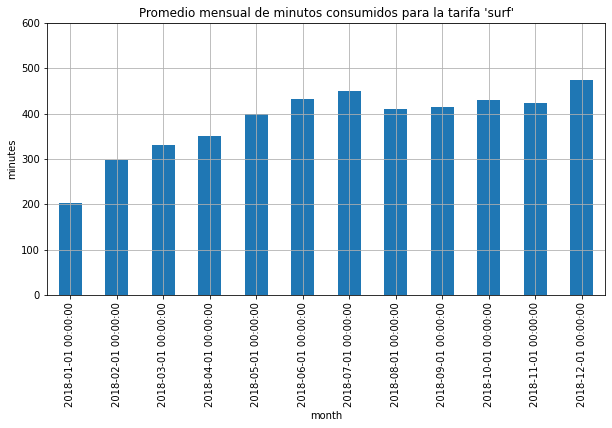

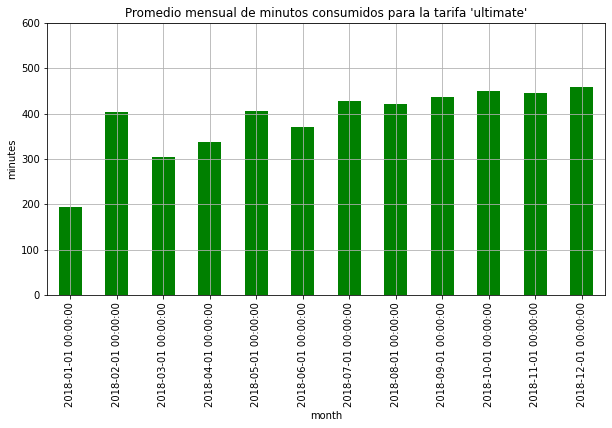

In [47]:
surf_mean.plot(kind="bar", label="surf", grid=True, ylabel="minutes", ylim=[0,600], title="Promedio mensual de minutos consumidos para la tarifa 'surf'", figsize=[10,5], legend=False)
ultimate_mean.plot(kind="bar", label="ultimate", grid=True, ylabel="minutes", ylim=[0,600], title="Promedio mensual de minutos consumidos para la tarifa 'ultimate'", figsize=[10,5], color='green', legend=False)

plt.show()

Para ambas tarifas, su mes con mayor consumo de minutos de llamada promedio, fue Diciembre. El mes con menor promedio fue Enero, igual para ambas tarifas. Sin embargo, podríamos decir que el plan "ultimate" es el que mayor holgura tiene, el promedio se encuentra muy lejos de su límite mensual.

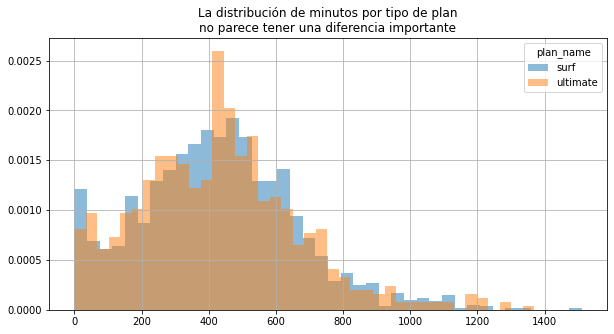

In [48]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plt.figure(figsize=(10, 5))
surf_behavior["total_minutes"].hist(ax=plt.gca(), bins=40,  density=True, alpha=0.5, label="surf")
ultimate_behavior["total_minutes"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="ultimate")
plt.legend(title="plan_name")
plt.title("La distribución de minutos por tipo de plan\nno parece tener una diferencia importante")
plt.show()


In [49]:
# Calcula la media y la varianza de la duración de llamadas.

A=surf_behavior["total_minutes"]
B=ultimate_behavior["total_minutes"]

print("Media del plan 'surf':", A.mean())
print("Varianza del plan 'surf':", np.var(A))
print()
print()
print("Media del plan 'ultimate':", B.mean())
print("Varianza del plan 'ultimate':", np.var(B))


Media del plan 'surf': 428.7495232040687
Varianza del plan 'surf': 54933.334591317485


Media del plan 'ultimate': 430.45
Varianza del plan 'ultimate': 57764.125277777785


La media y la varianza son ligeramente menores en el plan tarifario "surf", los usuarios con el plan "ultimate" por lo regular tienen llamadas más largas. 
Las varianzas son muy grandes, lo que nos indica que los datos de duración de llamadas, están muy dispersos.

Diagrama de caja para plan tarifario 'surf'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


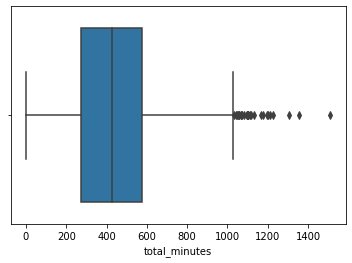

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración de llamadas

sns.boxplot(A)
print("Diagrama de caja para plan tarifario 'surf'")

Diagrama de caja para plan tarifario 'ultimate'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_minutes'>

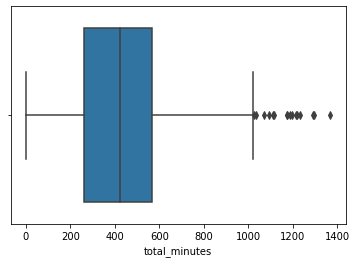

In [51]:
print("Diagrama de caja para plan tarifario 'ultimate'")
sns.boxplot(B)

El comportamiento de los usuarios con respecto a la duración de llamadas, no varía de un plan tarifario a otro. De hecho podemos observar en los diagramas de caja, que su comportamiento es muy similar. El tipo de plan no representa ninguna diferencia en el comportamiento de los usuarios al momento de realizar llamadas.

### Mensajes

In [52]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
agg_messages={"total_messages":"mean"}
messages_surf_mean=per_month_surf.agg(agg_messages)
messages_ultimate_mean=per_month_ultimate.agg(agg_messages)

In [53]:
print(messages_surf_mean)
print(messages_ultimate_mean)

            total_messages
month                     
2018-01-01       10.500000
2018-02-01       12.000000
2018-03-01       15.260870
2018-04-01       17.400000
2018-05-01       24.012987
2018-06-01       25.298969
2018-07-01       27.033058
2018-08-01       28.777778
2018-09-01       30.762887
2018-10-01       33.839662
2018-11-01       32.385159
2018-12-01       38.600629
            total_messages
month                     
2018-01-01       15.500000
2018-02-01       21.571429
2018-03-01       20.250000
2018-04-01       22.047619
2018-05-01       32.103448
2018-06-01       29.340426
2018-07-01       32.830508
2018-08-01       38.478873
2018-09-01       37.895349
2018-10-01       39.443396
2018-11-01       38.606299
2018-12-01       45.006623


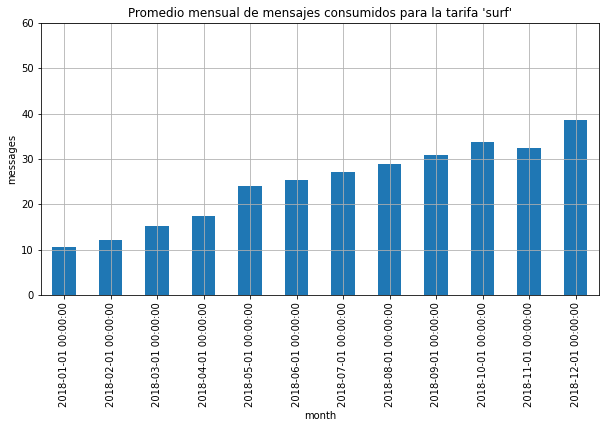

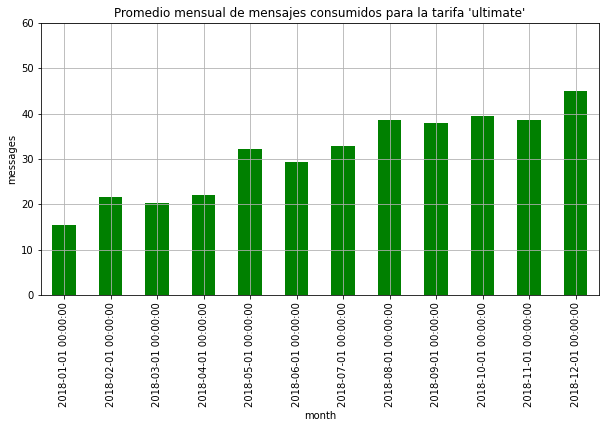

In [54]:
messages_surf_mean.plot(kind="bar", label="surf", grid=True, ylabel="messages", ylim=[0,60], title="Promedio mensual de mensajes consumidos para la tarifa 'surf'", figsize=[10,5], legend=False)
messages_ultimate_mean.plot(kind="bar", label="ultimate", grid=True, ylabel="messages", ylim=[0,60], title="Promedio mensual de mensajes consumidos para la tarifa 'ultimate'", figsize=[10,5], color='green', legend=False)

plt.show()

Para ambas tarifas, apreciamos como el consumo de mensajes va incrementando gradualmente hasta llegar al mes de Diciembre, su mes con mayor número de mensajes enviados en promedio. El mes con menor promedio fue Enero, igual para ambas tarifas. Sin embargo, podríamos decir que el plan "ultimate" es el que mayor holgura tiene, el promedio se encuentra muy lejos de su límite mensual. Los usuarios con el plan tarifario "ultimate" envían unos cuantos mensajes más, en promedio, que los del plan tarifario "surf".

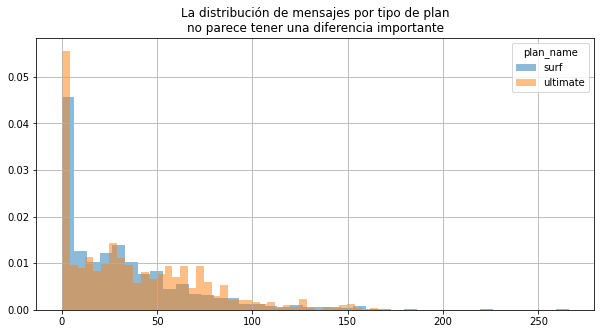

In [55]:
plt.figure(figsize=(10, 5))
surf_behavior["total_messages"].hist(ax=plt.gca(), bins=40,  density=True, alpha=0.5, label="surf")
ultimate_behavior["total_messages"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="ultimate")
plt.legend(title="plan_name")
plt.title("La distribución de mensajes por tipo de plan\nno parece tener una diferencia importante")
plt.show()


In [56]:
# Calcula la media y la varianza del número de mensajes.

C=surf_behavior["total_messages"]
D=ultimate_behavior["total_messages"]

print("Media del plan 'surf':", C.mean())
print("Varianza del plan 'surf':", np.var(C))
print()
print()
print("Media del plan 'ultimate':", D.mean())
print("Varianza del plan 'ultimate':", np.var(D))


Media del plan 'surf': 31.15956770502225
Varianza del plan 'surf': 1126.008231726662


Media del plan 'ultimate': 37.55138888888889
Varianza del plan 'ultimate': 1207.0779147376543


La media y la varianza son menores en el plan tarifario "surf", los usuarios con el plan "ultimate" por lo regular tienen unos cuantos mensajes más en promedio. Las varianzas son muy grandes, lo que nos indica que los datos de número de mensajes enviados, están muy dispersos.
Para ambos planes, gran parte de los usuarios no envían mensajes.

Diagrama de caja para plan tarifario 'surf'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


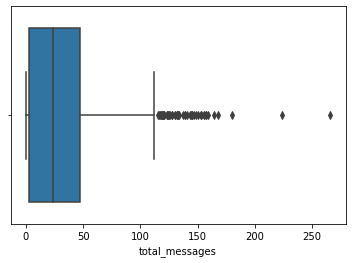

In [57]:
# Traza un diagrama de caja para visualizar la distribución del número de mensajes enviados.

sns.boxplot(C)
print("Diagrama de caja para plan tarifario 'surf'")

Diagrama de caja para plan tarifario 'ultimate'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_messages'>

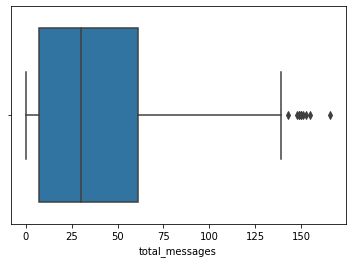

In [58]:
print("Diagrama de caja para plan tarifario 'ultimate'")
sns.boxplot(D)

El comportamiento de los usuarios con respecto al número de mensajes enviados, no varía mucho de un plan tarifario a otro. Podemos observar en los diagramas de caja, que su comportamiento es muy similar, aunque el plan "ultimate" tiene un diagrama de caja un poco más amplio. El tipo de plan representa una pequeña diferencia en el comportamiento de los usuarios al momento de enviar mensajes.

### Internet

In [59]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

agg_mb={"total_mb":"mean"}
mb_surf_mean=per_month_surf.agg(agg_mb)
mb_ultimate_mean=per_month_ultimate.agg(agg_mb)

In [60]:
print(mb_surf_mean)
print(mb_ultimate_mean)

                total_mb
month                   
2018-01-01   4874.860000
2018-02-01  12178.843333
2018-03-01  13345.440000
2018-04-01  11984.203000
2018-05-01  13936.354935
2018-06-01  15301.529175
2018-07-01  16783.600579
2018-08-01  16795.331358
2018-09-01  16591.431289
2018-10-01  17311.335063
2018-11-01  16339.254417
2018-12-01  18132.469371
                total_mb
month                   
2018-01-01   6918.092500
2018-02-01  17128.808571
2018-03-01  18321.518333
2018-04-01  16121.654762
2018-05-01  16624.482414
2018-06-01  15337.921064
2018-07-01  16344.744407
2018-08-01  17814.720141
2018-09-01  16969.869535
2018-10-01  17612.553396
2018-11-01  17033.685354
2018-12-01  18323.191854


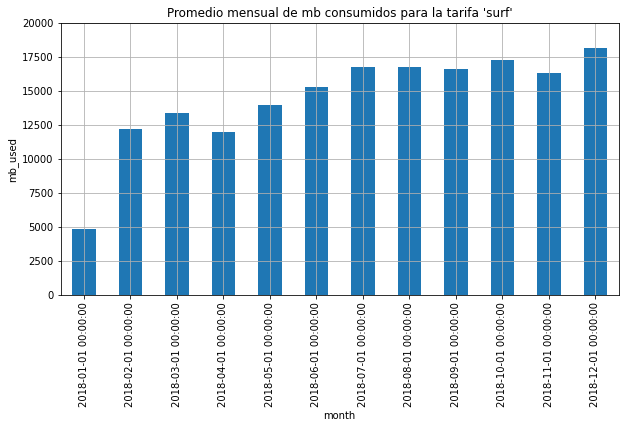

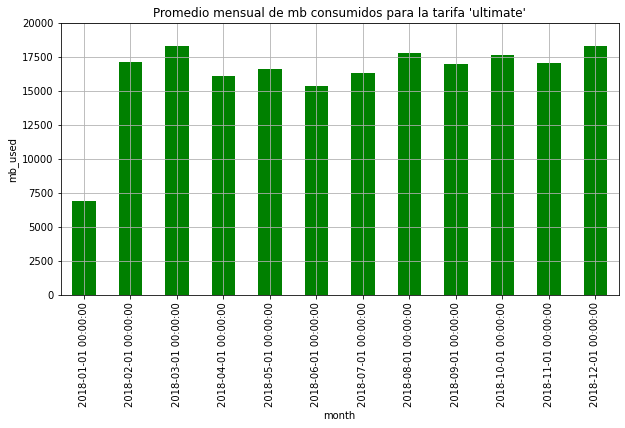

In [61]:
mb_surf_mean.plot(kind="bar", label="surf", grid=True, ylabel="mb_used", ylim=[0,20000], title="Promedio mensual de mb consumidos para la tarifa 'surf'", figsize=[10,5], legend=False)
mb_ultimate_mean.plot(kind="bar", label="ultimate", grid=True, ylabel="mb_used", ylim=[0,20000], title="Promedio mensual de mb consumidos para la tarifa 'ultimate'", figsize=[10,5], color='green', legend=False)

plt.show()

Para la tarifa "surf", apreciamos como el consumo de megabytes va incrementando gradualmente hasta llegar al mes de Diciembre, su mes con mayor número de megabytes consumidos en promedio. 
El mes con menor promedio, para ambas tarifas, fue Enero. 
Sin embargo, podríamos decir que el plan "ultimate" es el que mayor holgura tiene, el promedio se encuentra muy lejos de su límite mensual. Los usuarios con el plan tarifario "ultimate" utilizan más megabytes, en promedio, que los del plan tarifario "surf". Observamos que su comportamiento en el transcurso del año, no varía demasiado de mes en mes. 

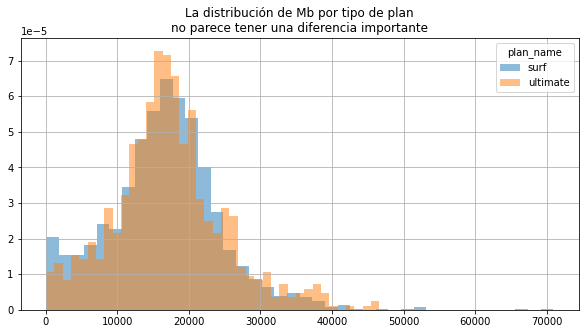

In [62]:
plt.figure(figsize=(10, 5))
surf_behavior["total_mb"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="surf")
ultimate_behavior["total_mb"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="ultimate")
plt.legend(title="plan_name")
plt.title("La distribución de Mb por tipo de plan\nno parece tener una diferencia importante")
plt.show()

In [63]:
E=surf_behavior["total_mb"]
F=ultimate_behavior["total_mb"]

print("Media del plan 'surf':", E.mean())
print("Varianza del plan 'surf':", np.var(E))
print()
print()
print("Media del plan 'ultimate':", F.mean())
print("Varianza del plan 'ultimate':", np.var(F))


Media del plan 'surf': 16558.283490146216
Varianza del plan 'surf': 64175571.68301331


Media del plan 'ultimate': 17214.699694444447
Varianza del plan 'ultimate': 61566665.1386863


La media es menor en el plan tarifario "surf", los usuarios con el plan "ultimate" por lo regular tienen más megabytes consumidos en promedio. Las varianzas son muy grandes, lo que nos indica que los datos de megabytes consumidos, están muy dispersos.

Diagrama de caja para plan tarifario 'surf'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


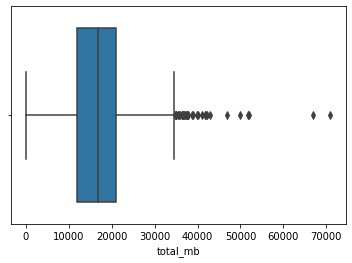

In [64]:
# Traza un diagrama de caja para visualizar la distribución de mb consumidos.

sns.boxplot(E)
print("Diagrama de caja para plan tarifario 'surf'")

Diagrama de caja para plan tarifario 'ultimate'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_mb'>

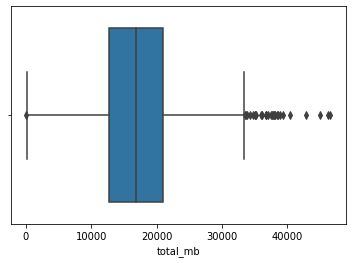

In [65]:
print("Diagrama de caja para plan tarifario 'ultimate'")
sns.boxplot(F)

El comportamiento de los usuarios con respecto al número de mb consumidos, varía un poco de un plan tarifario a otro. Podemos observar en los diagramas de caja, que su comportamiento es muy similar. El tipo de plan representa una pequeña diferencia en el comportamiento de los usuarios al momento de consumir megabytes.

## Ingreso

In [66]:
agg_income={"total_income":"mean"}
total_income_surf_mean=per_month_surf.agg(agg_income)
total_income_ultimate_mean=per_month_ultimate.agg(agg_income)

In [67]:
print(total_income_surf_mean)
print(total_income_ultimate_mean)

            total_income
month                   
2018-01-01     20.000000
2018-02-01     34.396667
2018-03-01     45.941304
2018-04-01     40.710600
2018-05-01     47.628182
2018-06-01     49.276289
2018-07-01     62.674050
2018-08-01     63.931173
2018-09-01     58.271495
2018-10-01     65.421224
2018-11-01     58.004276
2018-12-01     70.557044
            total_income
month                   
2018-01-01     70.000000
2018-02-01     70.000000
2018-03-01     74.666667
2018-04-01     73.000000
2018-05-01     70.724138
2018-06-01     71.638298
2018-07-01     71.898305
2018-08-01     72.859155
2018-09-01     72.034884
2018-10-01     72.311321
2018-11-01     71.708661
2018-12-01     73.291391


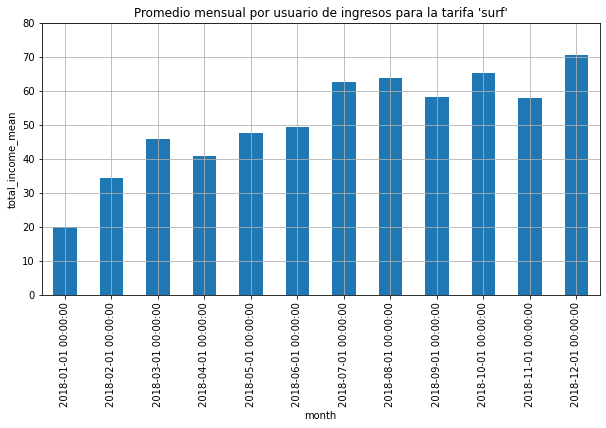

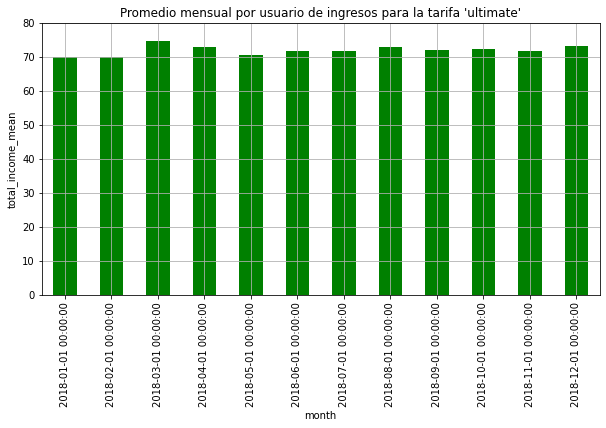

In [68]:
total_income_surf_mean.plot(kind="bar", label="surf", grid=True, ylabel="total_income_mean", ylim=[0,80], title="Promedio mensual por usuario de ingresos para la tarifa 'surf'", figsize=[10,5], legend=False)
total_income_ultimate_mean.plot(kind="bar", label="ultimate", grid=True, ylabel="total_income_mean", ylim=[0,80], title="Promedio mensual por usuario de ingresos para la tarifa 'ultimate'", figsize=[10,5], color='green', legend=False)

plt.show()

En el plan tarifario "ultimate" los ingresos mensuales promedio por usuario, para todo el año, varió muy poco, siendo muy poco por encima de la tarifa fija (70 USD). 
Por otro lado, apreciamos que el plan tarifario "surf" únicamente no superó la tarifa fija (20 USD) para el mes de enero, el resto de meses del año se obtuvieron ingresos promedios mucho mayores que la tarifa base, podríamos especular que gran parte de los usuarios se exceden en consumos y deben pagar mucho por sus adicionales.

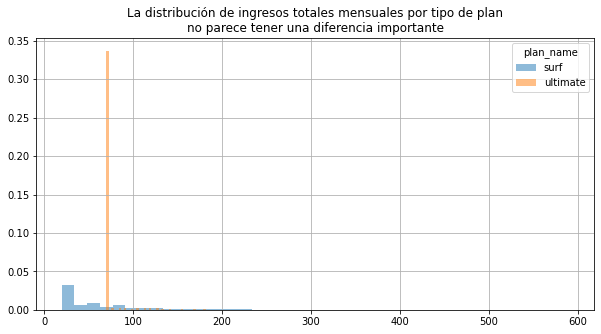

In [69]:
plt.figure(figsize=(10, 5))
surf_behavior["total_income"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="surf")
ultimate_behavior["total_income"].hist(ax=plt.gca(), bins=40, density=True, alpha=0.5, label="ultimate")
plt.legend(title="plan_name")
plt.title("La distribución de ingresos totales mensuales por tipo de plan\nno parece tener una diferencia importante")
plt.show()

In [70]:
G=surf_behavior["total_income"]
H=ultimate_behavior["total_income"]

print("Media del plan 'surf':", G.mean())
print("Varianza del plan 'surf':", np.var(G))
print()
print()
print("Media del plan 'ultimate':", H.mean())
print("Varianza del plan 'ultimate':", np.var(H))


Media del plan 'surf': 60.706408137317226
Varianza del plan 'surf': 3065.8848438690247


Media del plan 'ultimate': 72.31388888888888
Varianza del plan 'ultimate': 129.66814043209877


La media es menor en el plan tarifario "surf", pero es mucho mayor que la tarifa base. En el plan tarifario "ultimate" el promedio está por muy poco por encima de la tarifa base. 
La varianza de "surf" es muy grande, lo que nos indica que los ingresos varían mucho. Mientras que la varianza en "ultimate" es baja, lo que nos sugiere que la mayoría de los datos se encuentran cercanos a la media.

Esta distribución de valores la podemos observar en nuestro histograma.

Diagrama de caja para plan tarifario 'surf'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


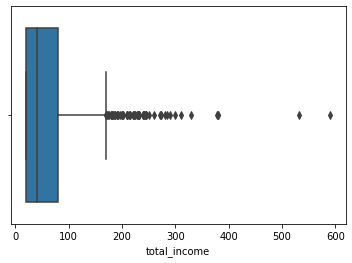

In [71]:
# Traza un diagrama de caja para visualizar la distribución de los ingresos totales por plan tarifario.

sns.boxplot(G)
print("Diagrama de caja para plan tarifario 'surf'")

Diagrama de caja para plan tarifario 'ultimate'


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_income'>

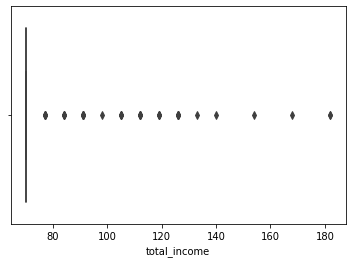

In [72]:
print("Diagrama de caja para plan tarifario 'ultimate'")
sns.boxplot(H)

El comportamiento de los ingresos, varía de un plan tarifario a otro. Podemos observar en los diagramas de caja, que su comportamiento es distinto. 
El tipo de plan representa una notable diferencia en el comportamiento de los ingresos.

## Prueba las hipótesis estadísticas

In [73]:
total_user_behavior_copy= total_user_behavior.copy()

In [74]:
# Prueba las hipótesis

total_user_behavior_copy.groupby("plan")["total_income"].mean()


plan
surf        60.706408
ultimate    72.313889
Name: total_income, dtype: float64

In [75]:
total_user_behavior_copy.groupby("plan")["total_income"].var()

plan
surf        3067.835152
ultimate     129.848486
Name: total_income, dtype: float64

In [76]:
alpha=.05

results=st.ttest_ind(
    total_user_behavior_copy.query("plan == 'surf'")["total_income"],
    total_user_behavior_copy.query("plan == 'ultimate'")["total_income"],
    equal_var=False
)

print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: los ingresos promedio son diferentes.")
else:
    print("No se rechaza la hipótesis nula: los ingresos promedio son iguales.")


T-statistic: -7.95209489133389
P-value: 3.17039054811355e-15
Se rechaza la hipótesis nula: los ingresos promedio son diferentes.


In [77]:
alpha= 0.05

surf_filtered=total_user_behavior_copy.query("plan == 'surf'")
ultimate_filtered=total_user_behavior_copy.query("plan == 'ultimate'")

results_levene=st.levene(surf_filtered["total_income"], ultimate_filtered["total_income"])

print("Levene statistic:", results_levene.statistic)
print("P-value:", results_levene.pvalue)

if results_levene.pvalue < alpha:
    print("Se rechaza la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: las varianzas son iguales.")

Levene statistic: 404.7301727752691
P-value: 5.028876110654919e-83
Se rechaza la hipótesis nula: las varianzas son diferentes.


In [78]:
total_user_behavior_copy[total_user_behavior_copy["city"].str.contains("NY-NJ")]["city"].unique()


array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [79]:
ny_nj_zones = ["New York-Newark-Jersey City, NY-NJ-PA MSA"]

In [80]:
print("Media área NY-NJ:" ,total_user_behavior_copy[total_user_behavior_copy["city"].isin(ny_nj_zones)]["total_income"].mean())
print("Media otras áreas:" ,total_user_behavior_copy[~total_user_behavior_copy["city"].isin(ny_nj_zones)]["total_income"].mean())

Media área NY-NJ: 59.92135278514589
Media otras áreas: 65.2227713987474


In [81]:
print("Varianza área NY-NJ:" ,total_user_behavior_copy[total_user_behavior_copy["city"].isin(ny_nj_zones)]["total_income"].var())
print("Varianza otras áreas:" ,total_user_behavior_copy[~total_user_behavior_copy["city"].isin(ny_nj_zones)]["total_income"].var())

Varianza área NY-NJ: 1895.5456899204241
Varianza otras áreas: 2225.0479943518917


In [82]:
alpha= 0.05

behavior_filtered_ny_nj_zone=total_user_behavior_copy[total_user_behavior_copy["city"].isin(ny_nj_zones)]
behavior_filtered_other_zones=total_user_behavior_copy[~total_user_behavior_copy["city"].isin(ny_nj_zones)]

results_levene_ny_nj=st.levene(behavior_filtered_ny_nj_zone["total_income"], behavior_filtered_other_zones["total_income"])

print("Levene statistic:", results_levene_ny_nj.statistic)
print("P-value:", results_levene_ny_nj.pvalue)

if results_levene_ny_nj.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las varianzas son diferentes.")
    var=False
else:
    print("Aceptamos la hipótesis nula: las varianzas son iguales.")
    var=True

Levene statistic: 2.3452816517300747
P-value: 0.12580091109612837
Aceptamos la hipótesis nula: las varianzas son iguales.


In [83]:
# Prueba las hipótesis

alpha=0.05

results=st.ttest_ind(
    behavior_filtered_ny_nj_zone["total_income"],
    behavior_filtered_other_zones["total_income"],
    equal_var=var
)

print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: los ingresos promedio son diferentes dependiendo la zona.")
else:
    print("No se rechaza la hipótesis nula: los ingresos promedio son iguales sin importar la zona.")

T-statistic: -2.0194429818968076
P-value: 0.04355743162134274
Se rechaza la hipótesis nula: los ingresos promedio son diferentes dependiendo la zona.


## Conclusión general

Podemos concluir que el departamento comercial debería concentrar una mayor parte del presupuesto de publicidad al plan de llamadas "ultimate". Este plan representó un promedio mayor de ingreso mensual, luego de observar el comportamiento de consumos de los usuarios, podemos determinar que como empresa nos conviene tener a la mayor cantidad de usuarios en este plan ya que: 
1. No utilizan todos los servicios proporcionados del plan (mb, mensajes, minutos de llamada)
2. Se obtiendría un ingreso mayor promedio durante todo el año.

Si se quisiera explorar algunas otras opciones de acciones para la empresa, podrían desarrollar un nuevo plan tarifario en el que la cantidad de GB disponibles se encuentre en un punto cercano a "ultimate", ya que el consumo promedio de ambos planes se acerca a los 20000 mb. Esto con el objetivo de aumentar la tarifa base que pagan los usuarios del plan "surf" y que les parezca muy caro el plan "ultimate".